# Predicting Breast Cancer Malignancy

### Goal: Build Convolution Neural Network(CNN) to classify if breast tissue is malignant based on patient biopsy slides. 

# Requirements 

### Datasets:
Kaggle Data Set: BreaKHis 400x
URL: https://www.kaggle.com/datasets/forderation/breakhis-400x

### Python:
Python3 (3.11.5)

### Modules:
TensorFlow (2.14.0)

Numpy (1.26.1)

Matplotlib (3.8.0)

Scikit Learn (1.3.2)

# Convolutional Neural Network

### Importing the libraries

In [18]:
from platform import python_version
import tensorflow as tf
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import sklearn
print('Python:',  python_version())
print ("Tensor Flow:", tf.__version__)
print ("Numpy:", np.__version__)
print ("Matplotlib:", matplotlib.__version__)
print ("Sklearn:", sklearn.__version__)

Python: 3.11.5
Tensor Flow: 2.14.0
Numpy: 1.26.1
Matplotlib: 3.8.0
Sklearn: 1.3.2


## Part 1 - Loading The Dataset

In [3]:
dataset_path = 'P:/Portfolio Sets/CNN Breast Tumors/BreaKHis 400X/train' 

### Training Set

In [4]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    labels = 'inferred',
    label_mode = 'categorical',
    color_mode='rgb',
    image_size = (64, 64),
    batch_size = 32,
    shuffle = True,
    seed = 100,
    validation_split = 0.2,
    subset = 'training')

Found 1148 files belonging to 2 classes.
Using 919 files for training.


### Validation Set

In [5]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path, 
    labels = 'inferred',
    label_mode ='categorical',
    color_mode='rgb',
    image_size = (64, 64),
    batch_size = 32,
    shuffle = True,
    seed = 100,
    validation_split = 0.2,
    subset = 'validation')

Found 1148 files belonging to 2 classes.
Using 229 files for validation.


### Test Set

In [6]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    'P:/Portfolio Sets/CNN Breast Tumors/BreaKHis 400X/test',
    labels = 'inferred',
    label_mode = 'categorical',
    color_mode='rgb',
    image_size = (64, 64),
    batch_size = 20,
    shuffle = False,
    validation_split = None,
    subset = None)

Found 548 files belonging to 2 classes.


In [7]:
#Check TensorSpec and Class Labels
print(train_dataset.element_spec)
print("+++++++++++++++++++++++++++++")
print(train_dataset.class_names)

(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))
+++++++++++++++++++++++++++++
['benign', 'malignant']


## Part 2 - Preprocessing/Augmentation 

In [8]:
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation

### Rescaling Validation and Test DataSet

In [9]:
Rescale = tf.keras.Sequential([Rescaling(1.0 / 255)])

validation_dataset = validation_dataset.map(lambda x, y: (Rescale(x, training = False), y))
test_dataset = test_dataset.map(lambda x, y: (Rescale(x, training = False), y))

### Augmentation

In [10]:
Augmentation = tf.keras.models.Sequential([   
    Rescaling(1.0 / 255),
    RandomFlip("horizontal"),
    RandomRotation(factor=0.2)
])

train_dataset = train_dataset.map(lambda x, y: (Augmentation(x, training = True), y))

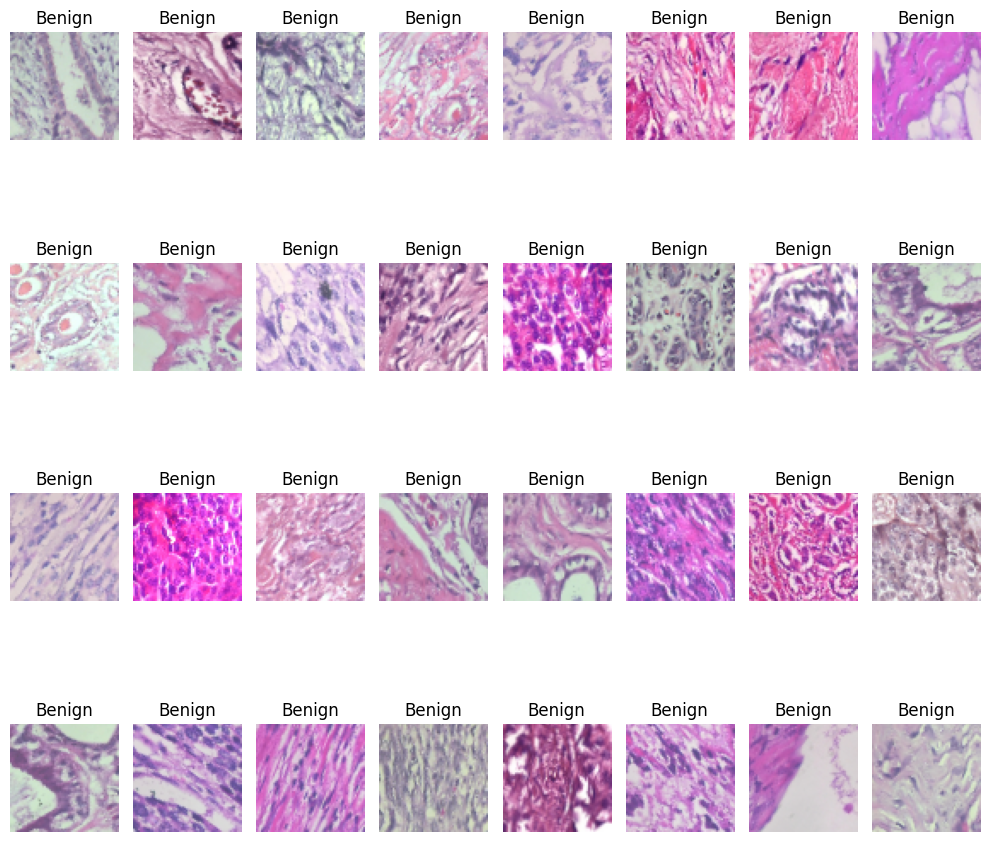

In [11]:
#Checking Training Images
for i, (images, labels) in enumerate(train_dataset):
    if i == 0:
        plt.figure(figsize = (10, 10))
        for p in range(len(images)):
            plt.subplot(4, 8, p+1)
            plt.imshow(images[p].numpy())
            plt.axis('off')
            if np.array_equal(labels[i].numpy(), np.array([1, 0])):
                plt.title("Benign")
            else:
                plt.title("Malignant")
        plt.tight_layout()
        plt.show()

## Part 3 - Building the CNN

### Convolution and Neural Network

In [12]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation ='relu', input_shape = (64, 64, 3)),
    tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding = 'valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'softmax')
])

### Compile The CNN

In [13]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 128)               3936384   
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 3937538 (15.02 MB)
Trainable params: 3937538 (15.02 MB)
Non-trainable params: 0 (0.00 Byte)
______________

## Part 4 - Training the CNN

### Training Model on Training Set and Evaluating on the Validation Set

In [14]:
cnn.fit(x = train_dataset, validation_data = validation_dataset, epochs = 25)

Epoch 1/25
29/29 [==============================] - 12s 321ms/step - loss: 1.2420 - accuracy: 0.6181 - val_loss: 0.5889 - val_accuracy: 0.6943
Epoch 2/25
29/29 [==============================] - 7s 202ms/step - loss: 0.5696 - accuracy: 0.7062 - val_loss: 0.4483 - val_accuracy: 0.8603
Epoch 3/25
29/29 [==============================] - 6s 194ms/step - loss: 0.4996 - accuracy: 0.7976 - val_loss: 0.4480 - val_accuracy: 0.7773
Epoch 4/25
29/29 [==============================] - 6s 179ms/step - loss: 0.5195 - accuracy: 0.7573 - val_loss: 0.4187 - val_accuracy: 0.8777
Epoch 5/25
29/29 [==============================] - 6s 178ms/step - loss: 0.4632 - accuracy: 0.8259 - val_loss: 0.3808 - val_accuracy: 0.8908
Epoch 6/25
29/29 [==============================] - 6s 171ms/step - loss: 0.4498 - accuracy: 0.8411 - val_loss: 0.3957 - val_accuracy: 0.8515
Epoch 7/25
29/29 [==============================] - 6s 175ms/step - loss: 0.4490 - accuracy: 0.8205 - val_loss: 0.4317 - val_accuracy: 0.7948
Epoch

## Part 5 - Evaluating The Model

### Whole Test Set

In [15]:
PredictProb = cnn.predict(test_dataset)
print(PredictProb)

#Setting Threshold
PredictClass = (PredictProb >= 0.5).astype(int)
print(PredictClass)

28/28 [==============================] - 8s 248ms/step
[[0.9168083  0.08319174]
 [0.8752863  0.12471369]
 [0.8178904  0.18210953]
 ...
 [0.1304181  0.86958194]
 [0.07015697 0.92984307]
 [0.07218259 0.9278174 ]]
[[1 0]
 [1 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]


### Whole Test Set: Confusion Matrix and Accuracy Score

In [16]:
#Pulling True Class Labels From Test set
TrueClass = np.empty((0, 2))
for images, labels in test_dataset:
    nlab = labels.numpy().astype(int)
    TrueClass = np.concatenate((TrueClass, nlab), axis=0)

#Confusion Matrix and Accuracy Score
from sklearn.metrics import confusion_matrix, accuracy_score
cm_True = np.argmax(TrueClass, axis= 1)  
cm_Predict = np.argmax(PredictClass, axis = 1)

print(confusion_matrix(cm_True, cm_Predict))
print(accuracy_score(cm_True, cm_Predict))

[[119  57]
 [ 35 337]]
0.8321167883211679


### Single Image Prediction

1/1 [==============================] - 0s 127ms/step
Prediction: Malignant


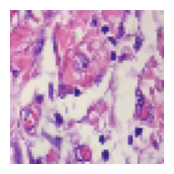

In [17]:
#Load and Rescale Image
test_image = tf.keras.utils.load_img('P:/Portfolio Sets/CNN Breast Tumors/BreaKHis 400X/test/malignant/SOB_M_DC-14-10926-400-005.png', target_size = (64, 64))
test_image = tf.keras.utils.img_to_array(test_image)
test_image /= 255

#Plot Image
plt.figure(figsize = (2, 2))
plt.axis('off')
plt.imshow(test_image)

#Model Prediction
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
result = (result >= 0.5).astype(int)
if np.all(result == np.array([1, 0])):
    print('Prediction: Benign')
elif np.all(result == np.array([0, 1])):
    print('Prediction: Malignant')
else:
    print('Error')